#Imports and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:1000,:]
sub_labels = train_labels[:1000]

#1 a

Text(0, 0.5, 'Percent Variance')

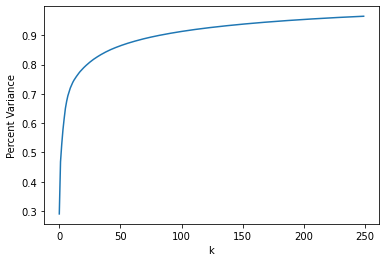

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

#Finding k
#X_tilda = U S V'
k=250 #random large k
svd = sklearn.decomposition.TruncatedSVD(n_components = k,random_state = 27)
svd.fit(X_tilda)
evr = svd.explained_variance_ratio_
cum_sum = [0]
for i in evr: cum_sum.append(cum_sum[-1]+i) 
cum_sum = cum_sum[1:] #removes the 0 put there earlier

plt.plot(range(len(cum_sum)), cum_sum)
plt.xlabel('k')
plt.ylabel('Percent Variance')
#cum_sum[186],cum_sum[187] bounds .95
#choose k=188 
#cum_sum[22],cum_sum[23] bounds .80 
#choose s = 23

In [ ]:
lda_list = []
qda_list = []
GNB_list = []
for s in range(23,188):  #(23,188)
    #fit/transform
    PCA = sklearn.decomposition.PCA(n_components = s)
    PCA.fit(X_tilda)
    Y_train = PCA.transform(X_tilda)
    Y_test = PCA.transform(X_test_centered)

    lda = LinearDiscriminantAnalysis()
    lda.fit(Y_train,train_labels)
    lda_preds = lda.predict(Y_test)
    lda_acc=accuracy_score(y_true=test_labels, y_pred=lda_preds)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(Y_train,train_labels)
    qda_preds = qda.predict(Y_test)
    qda_acc=accuracy_score(y_true=test_labels, y_pred=qda_preds)

    GNB = GaussianNB()
    GNB.fit(Y_train,train_labels)
    GNB_preds = GNB.predict(Y_test)
    GNB_acc=accuracy_score(y_true=test_labels, y_pred=GNB_preds)
    print(GNB_acc)

    print('S',s)
    print('LDA',lda_acc)
    print('DQA',qda_acc)
    print('GNB',GNB_acc)
    lda_list.append(lda_acc)
    qda_list.append(qda_acc)
    GNB_list.append(GNB_acc)

print(lda_list)
print(qda_list)
print(GNB_list)

In [ ]:
lda_acc = [0.7577, 0.7612, 0.7613, 0.7632, 0.7652, 0.7679, 0.7707, 0.7722, 0.7726, 0.7747, 0.7753, 0.7763, 0.7751, 0.7752, 0.7761, 0.7743, 0.7743, 0.7739, 0.7756, 0.7772, 0.7774, 0.779, 0.7793, 0.7812, 0.7806, 0.7799, 0.7802, 0.7799, 0.781, 0.781, 0.7817, 0.7827, 0.7827, 0.7827, 0.7832, 0.7834, 0.7849, 0.7853, 0.7857, 0.7877, 0.7873, 0.7875, 0.7891, 0.7877, 0.7886, 0.7891, 0.7884, 0.7884, 0.7886, 0.7893, 0.79, 0.7909, 0.7911, 0.7909, 0.7909, 0.7929, 0.7946, 0.7936, 0.7925, 0.7932, 0.7942, 0.7945, 0.7971, 0.796, 0.7958, 0.798, 0.7975, 0.7971, 0.7989, 0.7999, 0.7977, 0.7995, 0.7982, 0.7988, 0.7995, 0.7995, 0.7986, 0.7986, 0.7981, 0.7996, 0.8008, 0.7983, 0.7996, 0.8015, 0.8011, 0.8006, 0.8003, 0.7999, 0.801, 0.7995, 0.8002, 0.8008, 0.8026, 0.8028, 0.8009, 0.8028, 0.8022, 0.8032, 0.8039, 0.8022, 0.8029, 0.8027, 0.8024, 0.8043, 0.8022, 0.8048, 0.8044, 0.8041, 0.8059, 0.8032, 0.8065, 0.8049, 0.8051, 0.8043, 0.8052, 0.8065, 0.8074, 0.8057, 0.8058, 0.805, 0.8057, 0.8062, 0.8056, 0.8074, 0.8058, 0.8063, 0.8058, 0.8084, 0.8042, 0.8059, 0.8071, 0.8067, 0.8053, 0.8075, 0.8077, 0.8057, 0.8072, 0.8072, 0.8076, 0.8066, 0.8074, 0.808, 0.807, 0.807, 0.8083, 0.8069, 0.8079, 0.8076, 0.8091, 0.8076, 0.8076, 0.808, 0.8093, 0.8093, 0.8068, 0.8095, 0.8094, 0.8073, 0.8096, 0.8088, 0.8091, 0.809, 0.8106, 0.8089, 0.8089]
qda_acc = [0.7898, 0.7913, 0.7904, 0.7939, 0.7949, 0.7926, 0.7963, 0.7976, 0.7961, 0.7959, 0.7934, 0.7947, 0.7959, 0.7975, 0.7988, 0.7997, 0.8002, 0.8007, 0.8011, 0.7987, 0.7984, 0.7983, 0.7985, 0.7997, 0.8004, 0.7985, 0.7995, 0.7986, 0.7971, 0.7975, 0.7966, 0.7969, 0.7955, 0.795, 0.7966, 0.796, 0.7969, 0.7964, 0.7971, 0.7975, 0.7953, 0.7951, 0.7961, 0.7964, 0.7946, 0.7969, 0.7958, 0.7957, 0.7951, 0.7954, 0.7959, 0.7944, 0.7965, 0.7954, 0.7945, 0.7961, 0.7942, 0.7931, 0.7924, 0.7934, 0.7922, 0.7926, 0.7918, 0.7919, 0.7893, 0.7919, 0.7908, 0.7903, 0.7916, 0.7901, 0.7915, 0.7893, 0.789, 0.788, 0.7884, 0.7898, 0.7865, 0.7867, 0.7864, 0.7863, 0.7868, 0.7864, 0.7859, 0.7866, 0.7831, 0.786, 0.7847, 0.7836, 0.7831, 0.7844, 0.7839, 0.7825, 0.7823, 0.7834, 0.7818, 0.7813, 0.7826, 0.781, 0.7816, 0.7799, 0.7803, 0.78, 0.7797, 0.7798, 0.7809, 0.7803, 0.7789, 0.7799, 0.7793, 0.7782, 0.7785, 0.7788, 0.7787, 0.7782, 0.7775, 0.779, 0.7791, 0.7789, 0.7774, 0.777, 0.7778, 0.7777, 0.7776, 0.7759, 0.7765, 0.7766, 0.7775, 0.7753, 0.7746, 0.7756, 0.7755, 0.7756, 0.7755, 0.7754, 0.7751, 0.7748, 0.7753, 0.7754, 0.7727, 0.7726, 0.7744, 0.7726, 0.7732, 0.7733, 0.7727, 0.7724, 0.772, 0.7724, 0.7717, 0.7723, 0.7709, 0.7724, 0.7705, 0.771, 0.771, 0.7705, 0.7697, 0.7694, 0.7702, 0.7681, 0.7701, 0.7691, 0.769, 0.7693, 0.7689]
GNB_acc = [0.7434, 0.7476, 0.7504, 0.7544, 0.7537, 0.7552, 0.7593, 0.76, 0.7599, 0.7596, 0.7611, 0.7627, 0.7618, 0.7617, 0.7627, 0.7604, 0.7593, 0.7607, 0.7644, 0.7645, 0.7662, 0.7654, 0.7665, 0.7666, 0.7686, 0.7665, 0.7678, 0.7685, 0.7687, 0.7673, 0.7677, 0.7671, 0.7676, 0.7665, 0.7664, 0.7671, 0.7674, 0.7654, 0.7665, 0.7678, 0.7655, 0.7649, 0.7673, 0.7641, 0.7655, 0.7668, 0.763, 0.7651, 0.7642, 0.7621, 0.7631, 0.7639, 0.764, 0.7627, 0.7628, 0.7643, 0.7614, 0.7623, 0.7623, 0.7613, 0.7617, 0.7622, 0.7584, 0.7609, 0.7631, 0.7605, 0.7619, 0.7605, 0.7589, 0.7601, 0.7612, 0.7584, 0.7598, 0.7603, 0.7586, 0.7598, 0.7575, 0.7583, 0.7587, 0.7586, 0.7581, 0.7565, 0.7586, 0.7561, 0.7572, 0.7557, 0.7583, 0.7546, 0.7556, 0.7574, 0.7559, 0.7588, 0.7544, 0.7539, 0.7552, 0.7553, 0.7558, 0.7536, 0.7564, 0.754, 0.7551, 0.7547, 0.7539, 0.7547, 0.7529, 0.7535, 0.7526, 0.7534, 0.7538, 0.7514, 0.7554, 0.7526, 0.7509, 0.7521, 0.7514, 0.7516, 0.752, 0.7509, 0.7501, 0.7491, 0.751, 0.7493, 0.7513, 0.751, 0.7488, 0.7487, 0.7462, 0.7456, 0.7484, 0.7457, 0.7458, 0.7472, 0.7434, 0.7455, 0.7452, 0.7464, 0.7444, 0.7443, 0.7432, 0.7449, 0.7436, 0.7433, 0.7421, 0.7429, 0.7412, 0.74, 0.7426, 0.7397, 0.74, 0.7412, 0.7412, 0.7398, 0.7386, 0.7383, 0.739, 0.7393, 0.7372, 0.7375, 0.7375, 0.735, 0.7378, 0.737, 0.7366, 0.7351, 0.7367]
kernel_smoothing_acc = [0.7536  ,0.7608  ,0.7675  ,0.7692  ,0.7722  ,0.7729  ,0.777  ,0.7775  ,
0.776  ,0.7768  ,0.7754  ,0.7758  ,0.7777  ,0.7739  ,0.7753  ,0.7698  ,0.7717  ,0.7701  ,0.7737  ,
0.7717  ,0.7676  ,0.7691  ,0.7692  ,0.765  ,0.7661  ,0.7648  ,0.7663  ,0.7635  ,0.7595  ,0.762  ,
0.7596  ,0.757  ,0.7555  ,0.7548]

Text(0, 0.5, 'Percent Error')

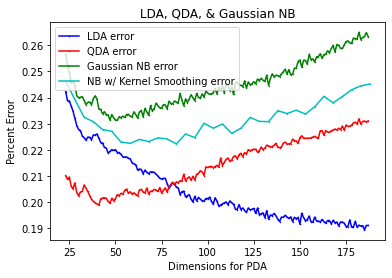

In [ ]:
#Plots
lda_error = 1-np.array(lda_acc)
qda_error = 1-np.array(qda_acc)
GNB_error = 1-np.array(GNB_acc)
kernel_error = 1-np.array(kernel_smoothing_acc)

#plots
plt.plot(23+np.arange(len(lda_error)), lda_error, '-bs', label='LDA error', markersize=0.5)
plt.plot(23+np.arange(len(lda_error)), qda_error,'-rs', label = 'QDA error', markersize=0.5)
plt.plot(23+np.arange(len(lda_error)), GNB_error,'-gs', label = 'Gaussian NB error', markersize=0.5)
plt.plot(range(23,189,5), kernel_error,'-cs', label = 'NB w/ Kernel Smoothing error', markersize=0.5)


plt.legend()
plt.title('LDA, QDA, & Gaussian NB')
plt.xlabel('Dimensions for PDA')
plt.ylabel('Percent Error')